## The Reutres dataset

A set of short newswires and their topics, published by Reuters in 1986. There are 46 different topics and each topic has at least 10 examples in the training set.

### Loading the Reuters dataset

In [1]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical # Converts a class vector (integers) to binary class matrix.
from tensorflow.keras import models
from tensorflow.keras import layers


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

sns.set_style('darkgrid')
mpl.rcParams["figure.dpi"]=125

In [2]:
# Restrict the data to the 10,000 most frequently occurring words found in the data.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

/home/ricardo/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/ricardo/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
print("Train shape:")
print(train_data.shape)
print(train_labels.shape)
print("\nTest shape:")
print(test_data.shape)
print(test_labels.shape)

Train shape:
(8982,)
(8982,)

Test shape:
(2246,)
(2246,)


In [4]:
print(train_data[0]) # word indices

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [5]:
print(train_labels[0]) # Topic index (integer between 0 and 45)

3


### Decoding newswires back to text

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]]) # offset by 3 cause reserved indices
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


### Preparing the data

#### Encoding the data

In [7]:
def vectorize_seq(sequences, dim=10000):
    results = np.zeros((len(sequences), dim))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [8]:
x_train = vectorize_seq(train_data) # Vectorized train data
x_test = vectorize_seq(test_data) # Vectorized test data

In [9]:
# To vectorize the labels
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### Building the network

In [10]:
model = models.Sequential()

model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
# For each input sample, the network will output a 46-dimensional vector.
model.add(layers.Dense(46, activation='softmax')) # Softmax converts a real vector to a vector of categorical probabilities.

### Compiling the model

In [11]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Validating

#### Setting aside a validation set

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

### Training the model

In [13]:
# For 20 epochs
EPOCHS = 6
# EPOCHS = 5
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=EPOCHS,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/6
16/16 [==============================] - 1s 40ms/step - loss: 2.8052 - accuracy: 0.4169 - val_loss: 1.4659 - val_accuracy: 0.6340
Epoch 2/6
16/16 [==============================] - 0s 22ms/step - loss: 1.2570 - accuracy: 0.7112 - val_loss: 1.3282 - val_accuracy: 0.6850
Epoch 3/6
16/16 [==============================] - 0s 22ms/step - loss: 0.9167 - accuracy: 0.7860 - val_loss: 1.0344 - val_accuracy: 0.7710
Epoch 4/6
16/16 [==============================] - 0s 22ms/step - loss: 0.6237 - accuracy: 0.8593 - val_loss: 1.0165 - val_accuracy: 0.7820
Epoch 5/6
16/16 [==============================] - 0s 23ms/step - loss: 0.4668 - accuracy: 0.8976 - val_loss: 0.9111 - val_accuracy: 0.8170
Epoch 6/6
16/16 [==============================] - 0s 21ms/step - loss: 0.2996 - accuracy: 0.9357 - val_loss: 0.9598 - val_accuracy: 0.8080


In [14]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,2.222523,0.523804,1.465885,0.634
1,1.173092,0.729516,1.328227,0.685
2,0.855997,0.803433,1.034428,0.771
3,0.611780,0.862566,1.016546,0.782
4,0.468312,0.896768,0.911117,0.817
5,0.325934,0.928589,0.959797,0.808


### Visualizing training and validation loss

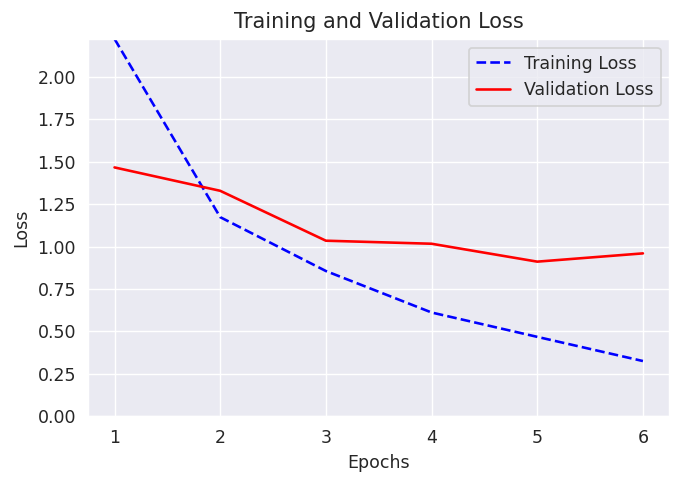

In [15]:
epochs = range(1, len(history_df) + 1)

plt.plot(epochs, history_df.loss, 'b--', label='Training Loss')
plt.plot(epochs, history_df.val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.ylim(0, np.max(history_df[['val_loss', 'loss']]).max())
plt.show()

### Plotting the training and validation accuracy

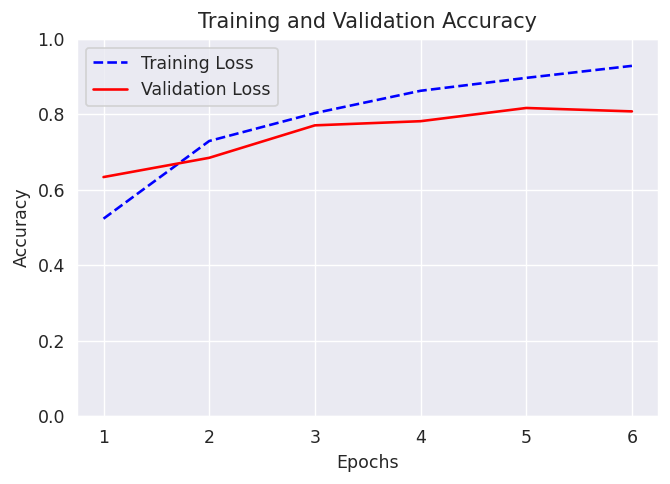

In [16]:
plt.plot(epochs, history_df.accuracy, 'b--', label='Training Loss')
plt.plot(epochs, history_df.val_accuracy, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.ylim(0, 1)
plt.show()

In [17]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 2ms/step - loss: 1.0599 - accuracy: 0.7729


We reach an accuracy of approximately 80%. 

### Generating predictions on new data

In [18]:
print(x_test.shape)

(2246, 10000)


In [19]:
predictions = model.predict(x_test)

In [20]:
print(predictions.shape) # Probability distributions over the 46 topics.

(2246, 46)


In [21]:
predictions[0]

array([2.5086507e-05, 2.2054135e-05, 1.3731571e-05, 9.8033959e-01,
       1.5988067e-02, 2.0831230e-05, 7.8415233e-06, 8.9722771e-06,
       1.4320065e-03, 3.2835082e-06, 1.0022035e-06, 5.2901969e-04,
       1.3202646e-04, 8.0383807e-06, 1.1179387e-04, 6.6132600e-07,
       1.2909666e-04, 2.0891898e-06, 2.7993949e-05, 5.2422949e-04,
       7.2904906e-05, 1.2666527e-04, 1.5937076e-05, 1.3075032e-05,
       2.2025426e-05, 6.3047351e-06, 1.8583722e-05, 3.2263777e-06,
       2.5132422e-06, 2.9881619e-05, 1.4611007e-05, 1.4648119e-05,
       2.2070831e-06, 1.9738145e-06, 1.3951058e-05, 8.4746932e-07,
       8.8836561e-05, 2.4676563e-06, 2.3825021e-05, 1.6705965e-04,
       7.3558422e-06, 9.3416220e-06, 1.9536674e-06, 9.5285222e-06,
       2.2287677e-06, 6.7837715e-07], dtype=float32)

In [22]:
# Sum to 1
predictions[0].sum()

0.99999994

In [23]:
# The class with the highest probability
np.argmax(predictions[0]) # Returns the indices of the maximum values along an axis.

3